In [1]:
!pip install tensorflow
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
from sklearn.metrics import mean_absolute_error, mean_squared_error,precision_score, recall_score,confusion_matrix,ConfusionMatrixDisplay


In [2]:
!pip install keras

In [2]:
path = "C:/Users/shaba/Desktop/part1/part1"
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(path)):
    image_path = os.path.join(path, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)





FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/shaba/Desktop/part1/part1'

In [3]:
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
op=len(df['image'])
print(op)

19653


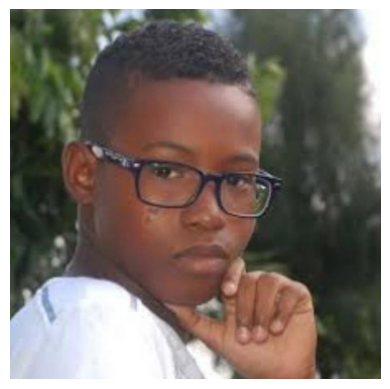

In [4]:
from PIL import Image
img = Image.open(df['image'][900])
plt.axis('off')
plt.imshow(img)

In [5]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [6]:
X = extract_features(df['image'])
X = X/255
print(X)

  0%|          | 0/19653 [00:00<?, ?it/s]

E:\anaconda\lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(
C:\Users\shaba\AppData\Local\Temp\ipykernel_11816\1669869017.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((128, 128), Image.ANTIALIAS)


[[[[0.16078431]
   [0.16078431]
   [0.19215686]
   ...
   [0.05490196]
   [0.05098039]
   [0.05098039]]

  [[0.14509804]
   [0.12156863]
   [0.21176471]
   ...
   [0.05490196]
   [0.05098039]
   [0.05882353]]

  [[0.1254902 ]
   [0.12941176]
   [0.24313725]
   ...
   [0.05490196]
   [0.05098039]
   [0.05882353]]

  ...

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]]


 [[[0.69411765]
   [0.69803922]
   [0.69803922]
   ...
   [0.77647059]
   [0.77254902]
   [0.76862745]]

  [[0.69411765]
   [0.69411765]
   [0.69411765]
   ...
   [0.77647059]
   [0.76470588]
   [0.76078431]]

  [[0.68627451]
   [0.69019608]
   [0.69411765]
   ...
   [0.76470588]
   [0.76078431]
   [0.75686275]]

  ...

  [[0.68627451]
   [0.71372549]
   [0.6

In [7]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])
print(y_gender)

[0 0 0 ... 1 1 1]


In [8]:
input_shape = (128, 128, 1)
inputs = Input((input_shape))
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])

In [9]:
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=8, validation_split=0.2)

Epoch 1/8
492/492 [==============================] - 163s 328ms/step - loss: 9.0544 - gender_out_loss: 0.7007 - age_out_loss: 8.3537 - gender_out_accuracy: 0.5271 - age_out_accuracy: 0.0812 - val_loss: 20.1536 - val_gender_out_loss: 0.6992 - val_age_out_loss: 19.4544 - val_gender_out_accuracy: 0.4403 - val_age_out_accuracy: 0.0000e+00
Epoch 2/8
492/492 [==============================] - 167s 339ms/step - loss: 8.2137 - gender_out_loss: 0.6742 - age_out_loss: 7.5396 - gender_out_accuracy: 0.5744 - age_out_accuracy: 0.0815 - val_loss: 19.8949 - val_gender_out_loss: 0.6779 - val_age_out_loss: 19.2170 - val_gender_out_accuracy: 0.5518 - val_age_out_accuracy: 0.0000e+00
Epoch 3/8
492/492 [==============================] - 161s 328ms/step - loss: 7.9501 - gender_out_loss: 0.6555 - age_out_loss: 7.2946 - gender_out_accuracy: 0.6098 - age_out_accuracy: 0.0811 - val_loss: 22.2136 - val_gender_out_loss: 0.6380 - val_age_out_loss: 21.5757 - val_gender_out_accuracy: 0.6441 - val_age_out_accuracy: 

In [1]:
gender_dict = {0:'Male', 1:'Female'}

image_index = 700
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
print(pred)
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

NameError: name 'y_gender' is not defined

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
image_path = "suraj.jpeg"
image = load_img(image_path, target_size=(128, 128), grayscale=True)
image = img_to_array(image)
image = image.reshape(1, 128, 128, 1)
image = image/255.0
pred = model.predict(image)
print(pred)
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(image.reshape(128, 128), cmap='gray');

E:\anaconda\lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


NameError: name 'model' is not defined

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
model = tf.keras.models.load_model("age_gender.h5")
image_path = "boy.jpg"
image = load_img(image_path, target_size=(128, 128), grayscale=True)
image = img_to_array(image)
image = image.reshape(1, 128, 128, 1)
image = image/255.0
print(image)
predictions = model.predict(image)
predicted_gender = "Female" if predictions[0][0] >= 0.5 else "Male"
predicted_age = int(predictions[1][0])
print("Predicted gender:", predicted_gender)
print("Predicted age:", predicted_age)

[[[[0.6156863 ]
   [0.63529414]
   [0.62352943]
   ...
   [0.8627451 ]
   [0.85882354]
   [0.8627451 ]]

  [[0.6431373 ]
   [0.627451  ]
   [0.6156863 ]
   ...
   [0.8666667 ]
   [0.8666667 ]
   [0.8666667 ]]

  [[0.6666667 ]
   [0.654902  ]
   [0.6431373 ]
   ...
   [0.87058824]
   [0.87058824]
   [0.87058824]]

  ...

  [[0.03137255]
   [0.02745098]
   [0.03137255]
   ...
   [0.00784314]
   [0.01568628]
   [0.02352941]]

  [[0.02352941]
   [0.02745098]
   [0.02352941]
   ...
   [0.01176471]
   [0.01568628]
   [0.01960784]]

  [[0.01960784]
   [0.01176471]
   [0.02352941]
   ...
   [0.01176471]
   [0.01568628]
   [0.02352941]]]]
1/1 [==============================] - 0s 104ms/step
Predicted gender: Female
Predicted age: 25


E:\anaconda\lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


E:\anaconda\lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 247ms/step
[array([[0.00143929]], dtype=float32), array([[36.19343]], dtype=float32)]
Predicted Gender: Male Predicted Age: 36


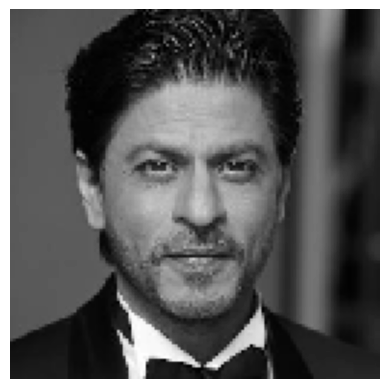

In [1]:
from keras.models import load_model
import matplotlib.pyplot as plt

model = load_model('age_gender.h5')
gender_dict = {0:'Male', 1:'Female'}


import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
image_path = "sharuk.jpg"
image = load_img(image_path, target_size=(128, 128), grayscale=True)
image = img_to_array(image)
image = image.reshape(1, 128, 128, 1)
image = image/255.0
pred = model.predict(image)
print(pred)
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(image.reshape(128, 128), cmap='gray');
